# ****************########Job Postings Sracpping Project########****************

## Participants

#### Tshegofatso Sekgobela
#### Simbarashe Karambwe
#### John Siphiwe
#### Cebisile
#### Vuyisile

## 1. What is Job Scrapping

Every day, a large number of job listings are placed on a variety of job boards and websites. Finding suitable roles can be difficult and time-consuming. Job scraping tools are as vital to the functioning of job boards. That’s because job scraping tools are responsible for looking for, acquiring, and processing the resource that serves as the lifeblood for the functioning of the job board . And the growing job market, combined with the emergence and expansion of the freelance market means that there is a constant growth in the number of job postings put out by employers across the nation. In this project we the gather job data across the web (job boards, career pages) and convert it to a structured format. 

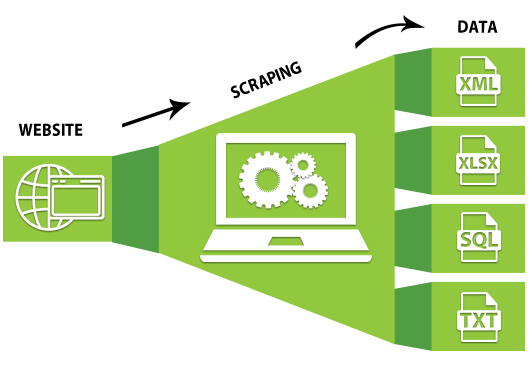

## 2. The purpose of the project

The goal of the project is to gather a large number of job listings and filter them into a format that meets the specific needs of EXPLORE graduates. As a result, time is saved for Explore graduates to search the internet for jobs that meet their requirements.

## 3. Project Limitations

* Because the majority of websites do not allow web scraping tools, the project is limited to those that do.

* There is probably a disconnect between the skills of those in the position and the skills being requested by job advertisements

* This analysis does not establish the most relevant skills for each of the job titles; rather, it determines the most relevant skills requested in job adverts.

* This analysis only looks at data science related job postings

# Web Scraping Job Postings from Indeed

For this project, we look at data science-related jobs posted on indeed.com, a job aggregator that updates multiple times daily, in a range of cities. we scrape information from Indeed's pages using Python's "requests" and "BeautifulSoup" libraries, then assembled the data into a dataframe using the "pandas" module for further cleaning and analysis.

We want to scrape the follwing feaatures from the  internet pages.

* #### Job title

* #### Company name

* #### Location

* #### Job summary

* #### Job Link

* #### Date posted

## Importing packages

In [2]:
import requests # request accesing pages
from bs4 import BeautifulSoup as Soup # to scrape html code from pages
import pandas as pd # to create a data frame
import numpy as np # generate random times for pauses between requests 

## Creating a Dataframe

In [3]:
features = ['Title','Company','Summary', 'Date'] # list of features
indeed = pd.DataFrame(columns = features) # Creating a dataframe named indeed

## Extracting All jobs from the pages

In [11]:
for page in range(0,1000):
    urls = "https://za.indeed.com/jobs?q=Data%20Scientist&start="
    url = urls + str(page*10)
    P_url = requests.get(url)
    P_html = P_url.text
    P_soup = Soup(P_html, "html.parser")
    containers = P_soup.findAll("div", {"class": "job_seen_beacon"})
    container = containers[0]

## Extracting Job Title, Company name, Job summary and Date posted

In [12]:
for container in containers:
        Title = container.findAll("div",{"class": "heading4"})
        if len(Title) != 0:
            title = Title[0].text.strip()
        else:
            title = "NaN"  

        Company = container.findAll("span",{"class":"companyName"})
        if len(Company) != 0:
            comp = Company[0].text.strip()
        else:
            comp = "NaN"  
        Location =  container.findAll('div',{"class":"companylocation"})
        if len(Location) != 0:
             loc = Location[0].text.strip()
        else:
            city = "NaN"  
 
        Summary = container.findAll("div",{"class":"job-snippet"})
        if len(Summary) != 0:
            summ = Summary[0].text.strip()
        else:
            summ = "NaN"  
    
        date = container.findAll('span',{"class":"date"})
        if len(date) != 0:
            dat = date[0].text.strip()
        else:
            dat = "NaN"         

## Adding the data to the created dataframe

In [13]:
data = pd.DataFrame([[title, comp, summ, dat]])
data.columns = features
indeed = indeed.append(data, ignore_index = True)



## Converting the Dataframe indeed to a CSV

In [14]:
indeed.to_csv('Jobs.csv')

In [15]:
indeed.shape # exploring the data entries

(2, 4)

In [10]:
indeed # veiwing the data

,Title,Company,Summary,Date
0,Technologist - Structures,AECOM,+ Collects and analyzes data under the supervi...,Posted30+ days ago
